In [6]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import joblib #pour sauvergarder la normalisation


In [3]:
#Chargement des données
donnees = pd.read_excel("rice_data.csv")

In [4]:
#Séparation des caractéristiques (X) et les étiquettes (y)
X = donnees.drop('Class', axis=1)
y = donnees['Class']

In [5]:
#la normalisation
Norm = MinMaxScaler()
X_Norm = Norm.fit_transform(X)

#sauvegarde
joblib.dump(Norm,'Normalisation.pkl')

In [16]:
#Encodage des étiquettes pour les transformer en valeurs numériques
Encode = LabelEncoder()
y_Encode = Encode.fit_transform(y)

In [17]:
#création du model de réseau de neurones
model = Sequential()

#Ajout de la première couche cachée avec 64 neurones et la fonction d'activation 'relu'
model.add(Dense(64, activation='relu'))
#Ajout de la deuxième couche cachée avec 32 neurones et la fonction d'activation 'relu'
model.add(Dense(32, activation='relu'))
#Ajout de la couche de sortie avec autant de neurones que de classes, activation 'softmax' pour la classification multicatégorielle
model.add(Dense(len(Encode.classes_), activation='softmax'))

In [18]:
#Compilation du modèle avec la fonction de perte, l'optimiseur, et la métrique d'évaluation
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [19]:
#Entraînement du modèle avec les données normalisées, 50 époques, taille de batch de 32, et 20% des données pour la validation
entrainement_model = model.fit(X_Norm, y_Encode, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.5493 - loss: 0.6498 - val_accuracy: 0.8045 - val_loss: 0.5066
Epoch 2/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8789 - loss: 0.3597 - val_accuracy: 0.8780 - val_loss: 0.3344
Epoch 3/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9266 - loss: 0.2168 - val_accuracy: 0.9094 - val_loss: 0.2313
Epoch 4/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9271 - loss: 0.1930 - val_accuracy: 0.9357 - val_loss: 0.1733
Epoch 5/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9312 - loss: 0.1848 - val_accuracy: 0.8911 - val_loss: 0.2473
Epoch 6/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9209 - loss: 0.1857 - val_accuracy: 0.9226 - val_loss: 0.1996
Epoch 7/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9281 - loss: 0.1884 - val_accuracy: 0.8885 - val_loss: 0.2615
Epoch 8/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9314 - loss: 0.1789 - val_accuracy: 0.8530 - val_loss

In [20]:
#Affichage du résumé du modèle pour visualiser la structure des couches et des paramètres
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 64)             │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,976 (31.16 KB)

 Trainable params: 2,658 (10.38 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,318 (20.78 KB)

In [21]:
#Extraction de la précision finale sur l'entraînement et la validation
train_accuracy = entrainement_model.history['accuracy'][-1] * 100
val_accuracy = entrainement_model.history['val_accuracy'][-1] * 100

print(f"\nPrécision finale sur l'entraînement : {train_accuracy:.2f}%")
print(f"Précision finale sur la validation : {val_accuracy:.2f}%")


Précision finale sur l'entraînement : 92.98%
Précision finale sur la validation : 88.58%


120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


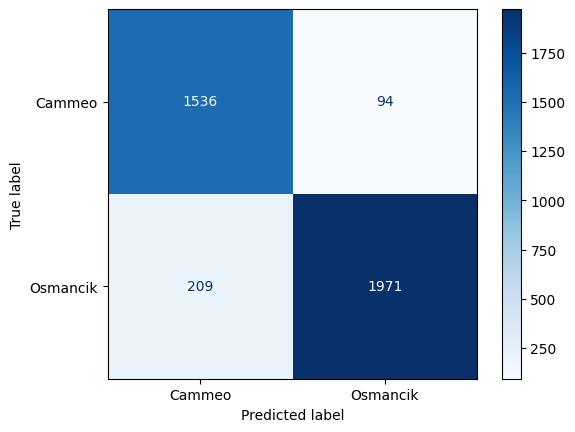

In [22]:
#Prédiction des classes pour les données normalisées
y_pred = model.predict(X_Norm)

#Conversion des prédictions en classes (indice de la classe ayant la plus grande probabilité)
y_pred_classes = np.argmax(y_pred, axis=1)

#Calcul et affichage de la matrice de confusion pour évaluer les performances du modèle
matrice = confusion_matrix(y_Encode, y_pred_classes)

#Affichage de la matrice de confusion
disp = ConfusionMatrixDisplay(confusion_matrix=matrice, display_labels=Encode.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [24]:
# Sauvegarder le modèle entraîné
model.save("modele_classification.h5")
print("Modèle sauvegardé avec succès !")

Modèle sauvegardé avec succès !
